In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
print(df.head())

(541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [3]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print("Missing values per column:")
print(df.isnull().sum())
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
df = df.dropna(subset=['CustomerID'])

In [6]:
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

In [7]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [8]:
# Basic information about the dataset
print("\nDataset info:")
print(df.info())

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Check unique values
print("\nUnique values:")
print("Customers:", df['CustomerID'].nunique())
print("Products:", df['StockCode'].nunique())
print("Countries:", df['Country'].nunique())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  float64       
 7   Country       397924 non-null  object        
 8   TotalPrice    397924 non-null  float64       
 9   InvoiceMonth  397924 non-null  period[M]     
 10  Revenue       397924 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4), period[M](1)
memory usage: 36.4+ MB
None

Statistical summary:
            Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000   


Top 10 customers by number of purchases:
CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64


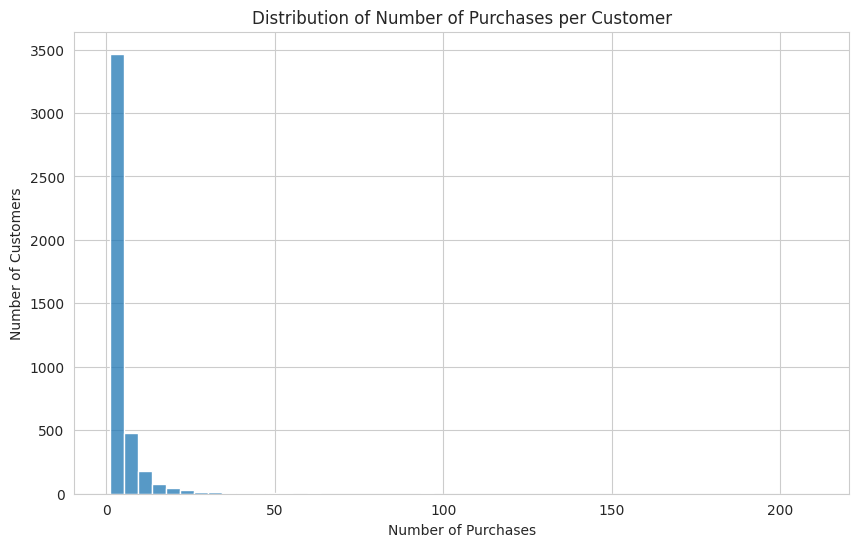


Top 10 customers by total spending:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


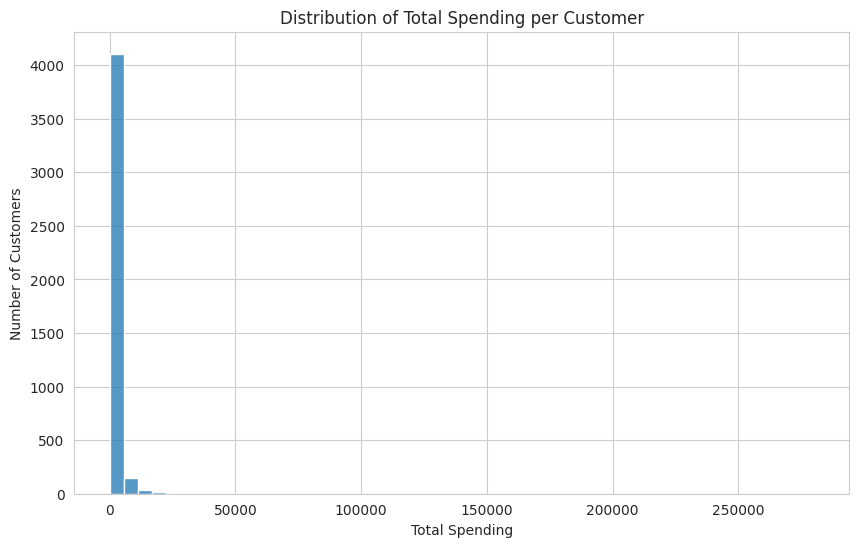

In [9]:
# Customer purchase frequency
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
print("\nTop 10 customers by number of purchases:")
print(customer_purchases.head(10))

# Plot customer purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchases, bins=50, kde=False)
plt.title('Distribution of Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Customer spending analysis
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop 10 customers by total spending:")
print(customer_spending.head(10))

# Plot customer spending
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=50, kde=False)
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()


Top 10 products by quantity sold:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

Top 10 products by revenue:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGH

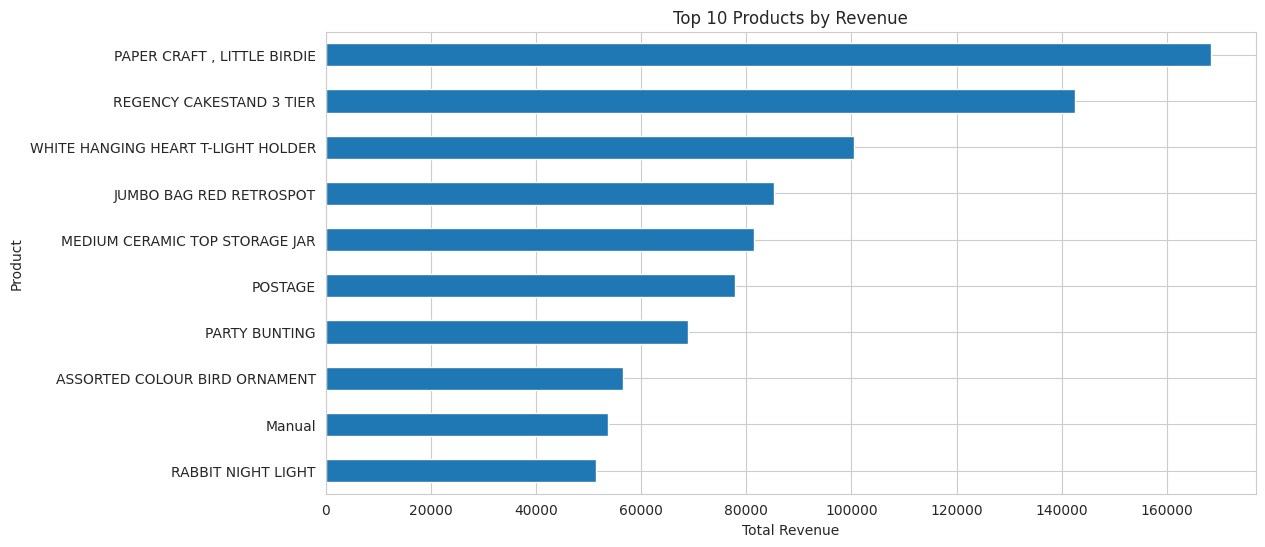

In [10]:
# Most popular products
product_popularity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nTop 10 products by quantity sold:")
print(product_popularity.head(10))

# Highest revenue products
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop 10 products by revenue:")
print(product_revenue.head(10))

# Plot top 10 products by revenue
plt.figure(figsize=(12, 6))
product_revenue.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

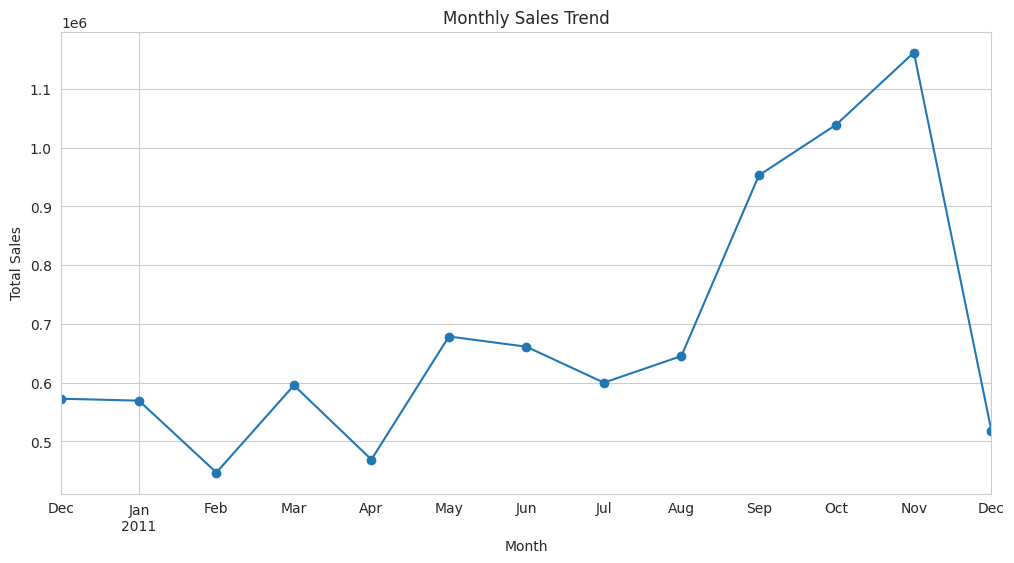

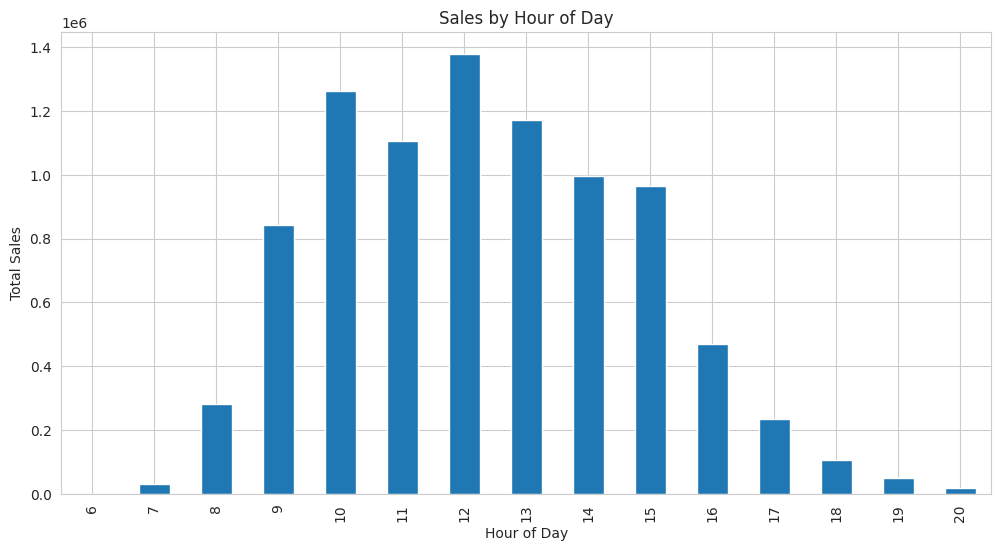

In [11]:
# Monthly sales trend
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Daily sales pattern
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('InvoiceHour')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

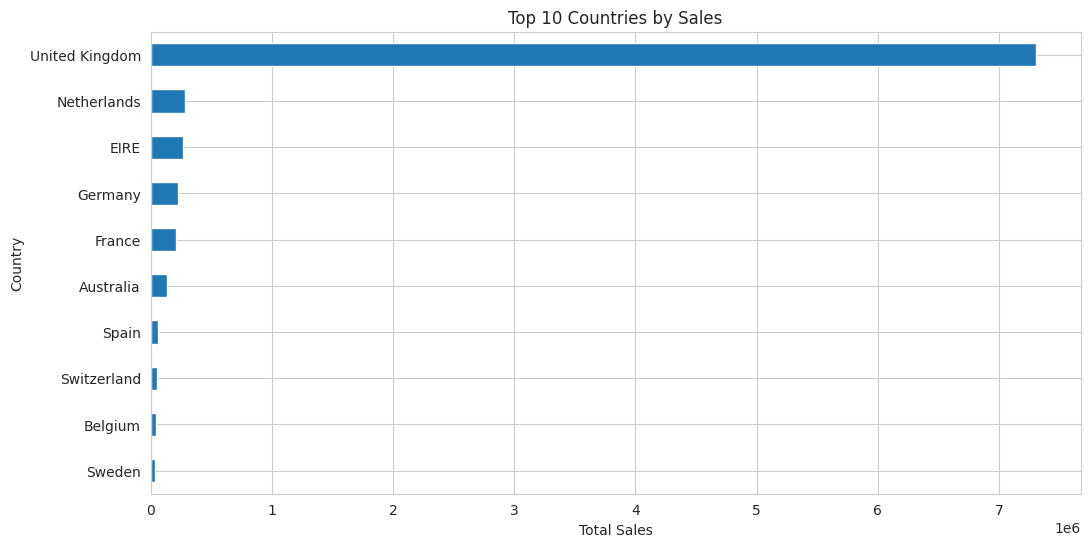

In [12]:
# Sales by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()